<a href="https://colab.research.google.com/github/Misetsu/Colab/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# インストール

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=678cde05401cf91e64fa77dc11a3fec40db54986c94124e43d7e485647b36a9d
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


# インポート

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel, mutual_info_classif
from sklearn.preprocessing import StandardScaler

# cancer データセット

In [ ]:
cancer = load_breast_cancer()

In [ ]:
print(cancer.keys())
print(cancer['feature_names'])
print(cancer['target_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [ ]:
df_cancer = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])
df_cancer['target'] = cancer['target']
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df_cancer.target.value_counts()

1    357
0    212
Name: target, dtype: int64

# カラム名

- ベース特徴量

|カラム名|意味|
|:-:|:-:|
radius | 腫瘍の半径
texture | テクスチャ: グレースケール値
perimeter | 腫瘍の周囲の長さ
area |腫瘍の面積
smoothness | めらかさ:半径の長さの変化
compactness | コンパクト性: 周囲長の二乗に対する面積の逆数と長さの平均値の和
concavity | 平均凹部: 腫瘍の表面の凹部の深さ
concave points | 腫瘍の表面の凹部の数
symmetry | 腫瘍の対称性
fractal dimension | フラクタル次元: 細胞の複雑さ

- 上記に対する三つの観点

|タイプ|意味|
|:-:|:-:|
mean | 平均値
error | 標準誤差
worst | 最悪値

# 訓練データとテストデータに分割

In [ ]:
# 必ずrandom_stateを42に設定してください
X_train, X_test, y_train, y_test = train_test_split(
    df_cancer.drop('target', axis=1),
    df_cancer.target,
    random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [ ]:
col = ['mean radius', 'mean texture']
X_train2 = X_train[col]

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train2, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test[col])

sum(y_test.values == y_pred)/len(y_test)

0.8951048951048951

In [ ]:
clf.score(X_test[col], y_test)

0.8951048951048951

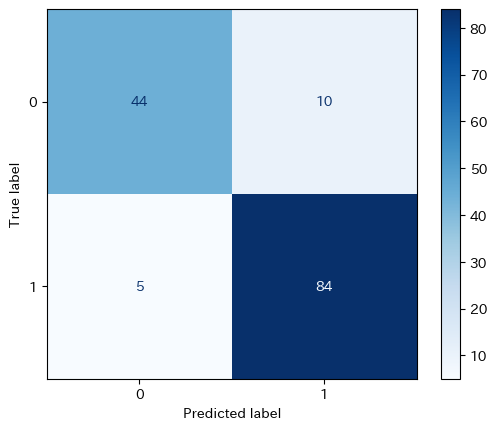

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm
)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        54
           1       0.89      0.94      0.92        89

    accuracy                           0.90       143
   macro avg       0.90      0.88      0.89       143
weighted avg       0.90      0.90      0.89       143



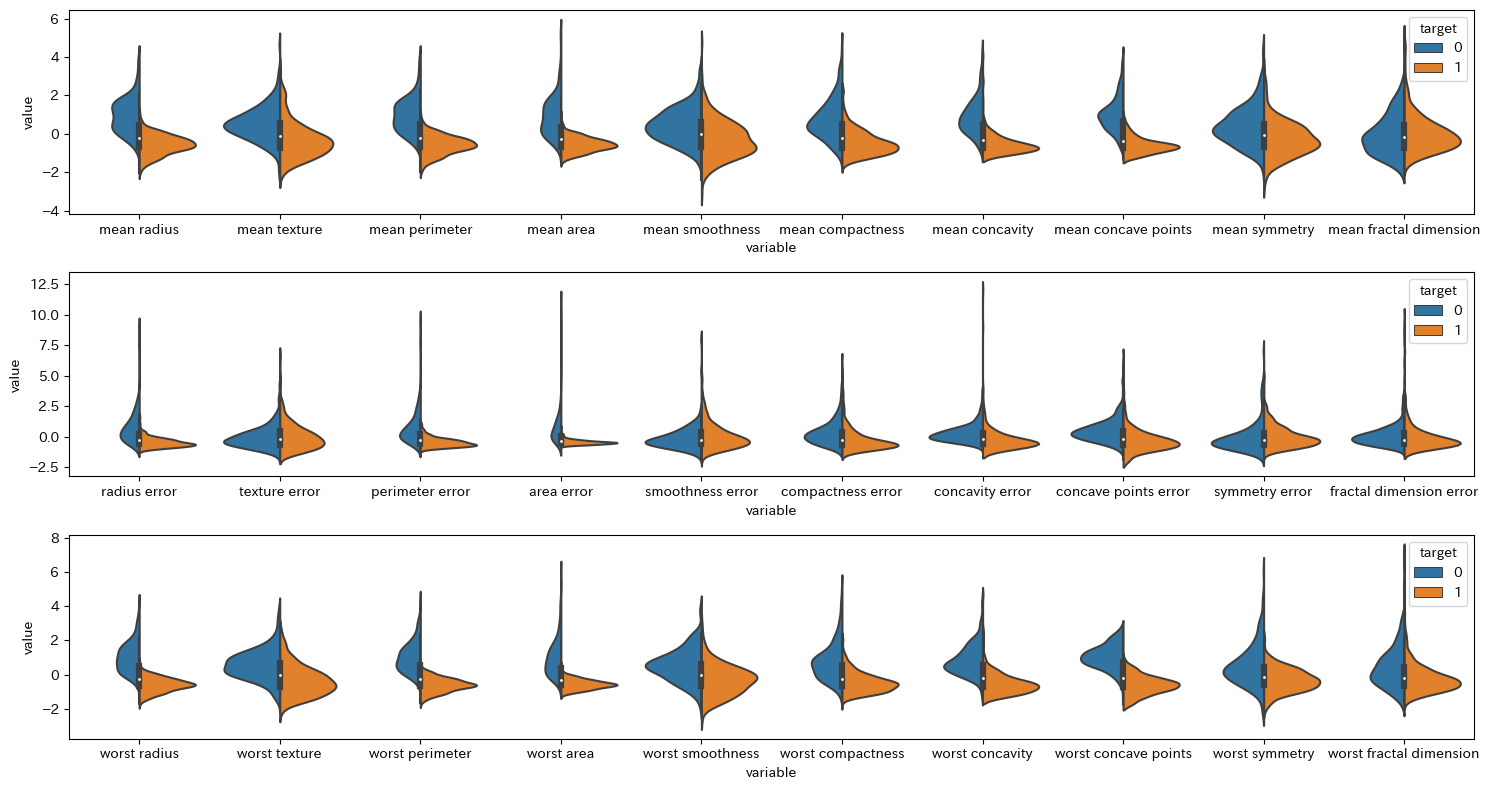

In [ ]:
from matplotlib import axes
df_temp = (df_cancer - df_cancer.mean()) / df_cancer.std()
df_temp['target'] = df_cancer['target']

df_temp = pd.melt(df_temp, id_vars='target')

fig, axs = plt.subplots(3, 1, figsize=(15, 8))
for i, c in enumerate(['mean', 'error', 'worst']):
  sns.violinplot(data=df_temp.query('variable.str.contains(@c)'),
                 x="variable", y="value", hue="target", split=True,
                 ax=axs[i])
fig.tight_layout()

# 特徴量の絞り込み

## 1st trial

In [ ]:
sc = StandardScaler()
X_trainsd = sc.fit_transform(X_train)
X_testsd = sc.fit_transform(X_test)

In [ ]:
param_grid = {
    'n_estimators': [25, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_trainsd, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [25, 200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 25}

In [ ]:
clf = RandomForestClassifier(n_estimators=500, random_state=42,
                             max_depth=8, max_features='sqrt',
                             criterion='entropy')
clf.fit(X_trainsd, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

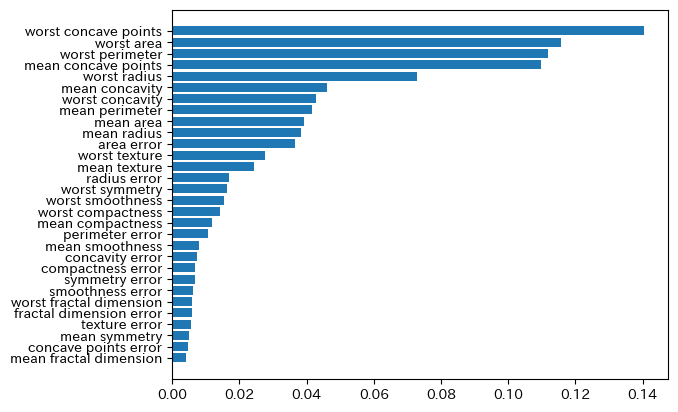

In [ ]:
sort_idx = clf.feature_importances_.argsort()
plt.barh(cancer.feature_names[sort_idx], clf.feature_importances_[sort_idx])
plt.show()

In [ ]:
col = ['worst concave points', 'worst perimeter',
       'worst area', 'mean concave points', 'worst radius']
X_train5 = X_train[col]
X_test5 = X_test[col]

In [ ]:
sc = StandardScaler()
X_train5sd = sc.fit_transform(X_train5)
X_test5sd = sc.fit_transform(X_test5)

In [ ]:
clf = RandomForestClassifier(n_estimators=500, random_state=42,
                             max_depth=8, max_features='sqrt',
                             criterion='entropy')
clf.fit(X_train5sd, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

In [ ]:
clf.score(X_test5sd, y_test)

0.972027972027972

In [ ]:
y_pred = clf.predict(X_test5sd)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.97      0.99      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



## 2nd trial

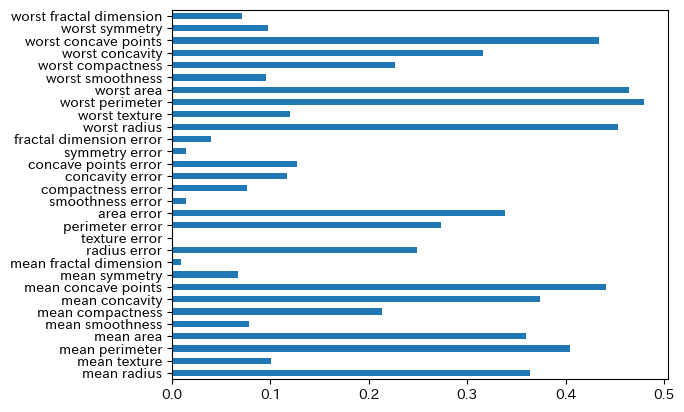

In [ ]:
importance = mutual_info_classif(df_cancer.drop('target', axis=1),
                                 df_cancer.target)
feat_importance = pd.Series(importance, df_cancer.columns[0:len(df_cancer.columns)-1])
feat_importance.plot(kind="barh")
plt.show()

In [ ]:
col = ["worst perimeter", "worst area", "worst radius",
       "mean concave points", "worst concave points"]

1回目と同じ結果になりました。